In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9826 non-null   object 
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.0+ KB


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum() #To check if there are any duplicate movie

np.int64(0)

In [7]:
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) #Convert the type to date time format
df['Release_Date'].dtypes


dtype('<M8[ns]')

In [9]:
df['Release_Date'] = df['Release_Date'].dt.year #Convert the date time to show only the year

In [10]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the unwanted columns

In [11]:
cols = ['Overview', 'Original_Language', 'Poster_Url'] # Putting the nwanted columns in a list for easier column dropping

df.drop(cols , axis = 1, inplace = True) #Droping the unwanted columns

Categorizing Vote_Average column

In [12]:
df['Vote_Average'].describe()

count    9826.000000
mean        6.439467
std         1.129797
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64

In [13]:
df['Vote_Average'].describe()['max']

np.float64(10.0)

In [14]:
def categorizing_vote(df, col, labels):

    bins = [

        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']


    ] #Creating bins

    df[col] = pd.cut(df[col] , bins, labels = labels, duplicates = 'drop') #Converting the numerical vote to categorical values 
    return df




In [15]:
labels = ['not Popular', 'below_average', 'average', 'popular'] #Creating the values for the categorical values

categorizing_vote(df, 'Vote_Average', labels) #Calling the user defined function above



,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9821,1973,Badlands,13.357,896,popular,"Drama, Crime"
9822,2020,Violent Delights,13.356,8,not Popular,Horror
9823,2016,The Offering,13.355,94,not Popular,"Mystery, Thriller, Horror"
9824,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [16]:
df['Vote_Average'].value_counts() #Counts the no. of movies in each category

Vote_Average
not Popular      2467
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [17]:
df.isna().sum() #to check if there are any null values

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [18]:
df.dropna(inplace=True) #drops the null values

In [19]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

Spliting Genres into list and then explode our dataframe to have only one genre per row for each movie

In [20]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [21]:
df['Genre'] = df['Genre'].str.split(', ') # splits the multiple genres

In [22]:
df = df.explode('Genre').reset_index(drop= True) #shows the genre on different lines

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [24]:
df['Genre'] = df['Genre'].astype('category') #Converting the genre column into category data tyoe

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


DATA VISUALISATION

MOST FREQUENT GENTRE OF MOVIE RELEASED ON NETFLIX

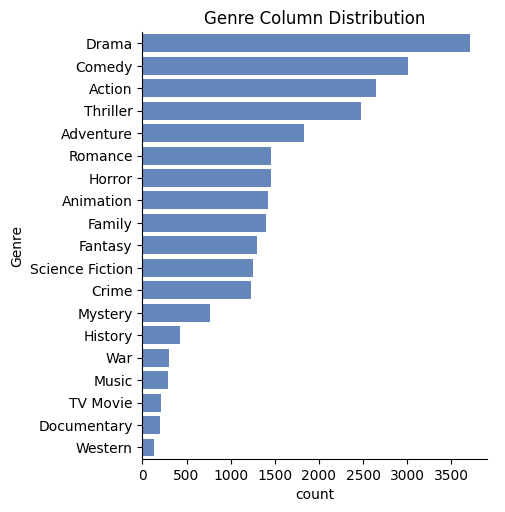

In [26]:
sns.catplot(y='Genre', data = df, kind = 'count', order= df['Genre'].value_counts().index, color= "#5683ca")

plt.title('Genre Column Distribution')
plt.show()

HIGHEST VOTE IN VOTE AVGERAGE COLUMN

(0.0, 7000.0)

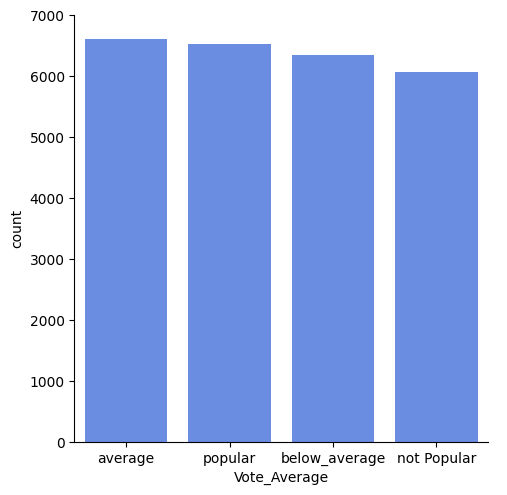

In [27]:
sns.catplot(

    x = 'Vote_Average',
    data= df,
    kind= 'count',
    order= df['Vote_Average'].value_counts().index,
    color= '#5683f5',

)

plt.ylim(0, 7000)



MOVIE WITH THE HIGHEST POPULARITY

In [28]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


MOVIE WITH THE LEAST POPULARITY

In [29]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


YEAR WITH THE MOST FILMED MOVIES

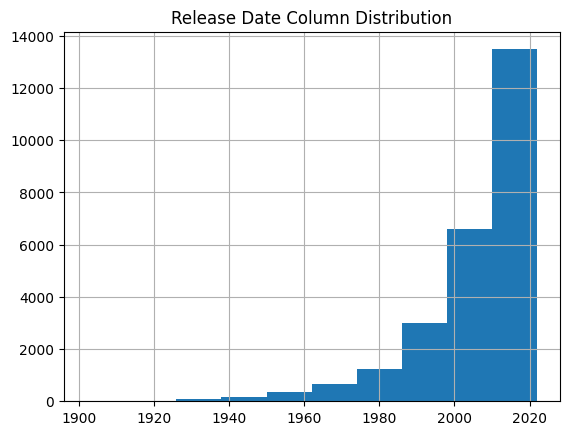

In [30]:
df['Release_Date'].hist()

plt.title('Release Date Column Distribution')
plt.show()

In [31]:
df['Release_Date'].value_counts().max() #highest no. of movies in a year

np.int64(1636)

In [32]:
df['Release_Date'].value_counts().idxmax() #year with the highest no. of movies released

np.int32(2021)